# Market Basket Analysis (Apriori)

 
## Data Preprocessing and Exploratory Data Analysis

In [26]:
#Loading necessary libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [27]:
#Displaying max rows = 500 rows
pd.set_option('display.max_rows', 500)

In [28]:
#Reading data
df = pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


### Initial data exploration

In [29]:
df.shape

(541909, 8)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [31]:
# Return a random sample of items from dataset 
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
446293,574891,22358,KINGS CHOICE TEA CADDY,4,07-11-2011 14:28,2.95,14606.0,United Kingdom
312245,564342,84754,S/15 SILVER GLASS BAUBLES IN BAG,2,24-08-2011 14:53,1.25,16340.0,United Kingdom
236359,557750,16218,CARTOON PENCIL SHARPENERS,80,22-06-2011 12:50,0.06,16841.0,United Kingdom
511329,579491,23188,VINTAGE 2 METRE FOLDING RULER,2,29-11-2011 15:23,1.65,14723.0,United Kingdom
524677,580610,21916,SET 12 RETRO WHITE CHALK STICKS,2,05-12-2011 11:48,0.79,NaN,United Kingdom
250702,559042,22920,HERB MARKER BASIL,2,05-07-2011 15:34,1.63,NaN,United Kingdom
65787,541696,84870C,GREEN GEISHA GIRL,2,20-01-2011 18:08,2.46,NaN,United Kingdom
106631,545337,21034,REX CASH+CARRY JUMBO SHOPPER,2,01-03-2011 17:28,0.95,15984.0,United Kingdom
40720,539740,21733,RED HANGING HEART T-LIGHT HOLDER,1,21-12-2010 15:20,5.91,NaN,United Kingdom
357699,568104,22426,ENAMEL WASH BOWL CREAM,1,23-09-2011 15:50,3.75,16485.0,United Kingdom


### Data Cleansing

In [32]:
# Remove spaces at the beginning and at the end of the string
df['Description'] = df['Description'].str.strip() 

#Convert InvoiceNo to str
df['InvoiceNo'] = df['InvoiceNo'].astype('str')  

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [33]:
# Display rows containing missing values 

null_data = df[df.isnull().any(axis=1)]  #'any(axis=1)': Checking rows if any null values exists 
null_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01-12-2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01-12-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01-12-2010 14:32,1.66,NaN,United Kingdom


In [34]:
print('Sum of rows having missing values: '+ str(df.isnull().sum()))

Sum of rows having missing values: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [35]:
#Drop rows have missing values and print the size of the cleaned dataset
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print('Shape of the cleaned dataframe: ',df.shape)

Shape of the cleaned dataframe:  (406829, 8)


135,080 rows are dropped (541,909 - 406,829 = 135,080 )

### Exploratory Data Analysis

In [36]:
item = df['Description'].value_counts()
item

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
BLUE FLYING SINGING CANARY               1
LILAC FEATHERS CURTAIN                   1
NECKLACE+BRACELET SET PINK DAISY         1
IVORY SHELL HEART EARRINGS               1
BAROQUE BUTTERFLY EARRINGS CRYSTAL       1
Name: Description, Length: 3885, dtype: int64

In [37]:
item.shape

(3885,)

There are 3,885 different items

In [45]:
# Count quantities/frequency of purchased items 

# Transform them to a Pandas DataFrame
df["incident_count"] = 1 # Put 1 to each item for Making a Countable Table, to be able to perform groupby
df_table = df.groupby("Description").sum().sort_values('Quantity', ascending=False).reset_index()
table = df_table.drop(columns=['UnitPrice', 'CustomerID'])

# Visualizations (top 15 items)
table.head(15).style.background_gradient(cmap='PuBu')

,Description,Quantity,incident_count
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215,478
1,JUMBO BAG RED RETROSPOT,45066,1662
2,ASSORTED COLOUR BIRD ORNAMENT,35314,1418
3,WHITE HANGING HEART T-LIGHT HOLDER,34147,2070
4,PACK OF 72 RETROSPOT CAKE CASES,33409,1080
5,POPCORN HOLDER,30504,693
6,RABBIT NIGHT LIGHT,27094,857
7,MINI PAINT SET VINTAGE,25880,335
8,PACK OF 12 LONDON TISSUES,25321,399
9,PACK OF 60 PINK PAISLEY CAKE CASES,24163,692


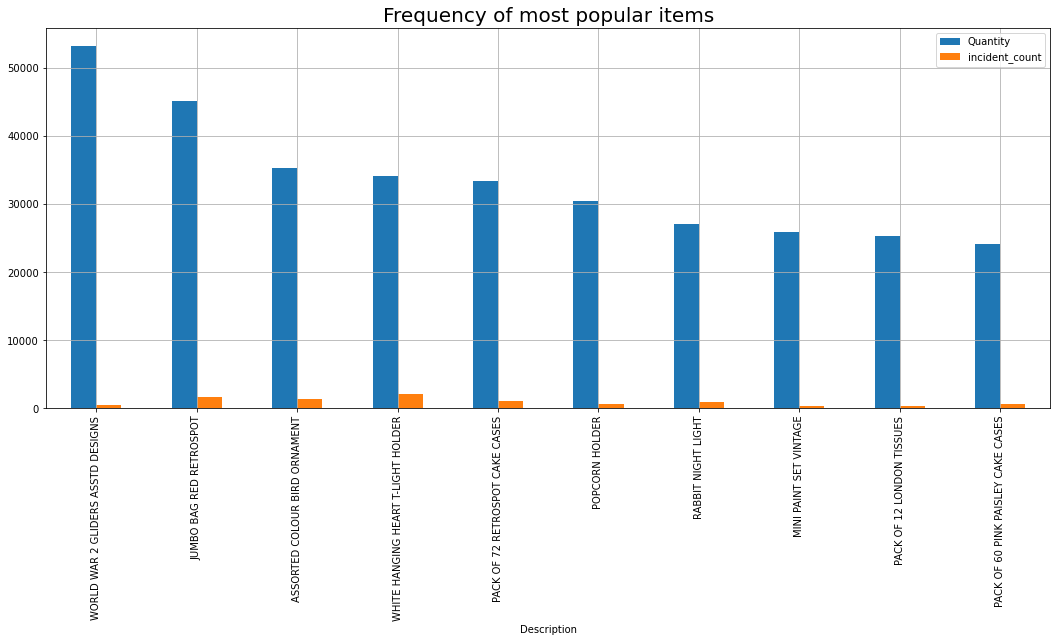

In [46]:
# looking at the frequency of most popular items (quantities/frequency of purchased items )

plt.rcParams['figure.figsize'] = (18, 7)

table_bar = table.set_index('Description', inplace=False)

table_bar.head(10).plot.bar()

plt.title('Frequency of most popular items', fontsize = 20)

plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [47]:
#Count_values for different countries (how many records for each country)
df['Country' ].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

## Analysis (change!)

In [48]:
#Organizing data inclu.group by invoiceNo and description, and sum on quantity
basket = (df.groupby (['InvoiceNo','Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket 

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-11.0,0.0,0.0,0.0,0.0
C581499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#Encoding 
#Converting all positive nrs to 1 and everything else to 0 (this is how the algorithm of association analysis expect the input  data to be )

def encode_units(x): 
    if x<= 0: 
        return 0
    if x>= 1: 
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets.dropna(inplace=True, axis=1)
basket_sets

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#Training Model
#generating frequent items (running apriori on my_basket_sets)

frequent_itemsets = apriori(basket_sets, min_support = 0.02, use_colnames=True)

#generating rules and setting based on lift and has minimum lift as 1
rules = association_rules (frequent_itemsets, metric="lift", min_threshold=1)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.039522,0.035557,0.023885,0.604333,16.996386,0.022479,2.437513
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.035557,0.039522,0.023885,0.671736,16.996386,0.022479,2.925934
2,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.028616,0.034069,0.020865,0.729134,21.401429,0.019890,3.566081
3,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.034069,0.028616,0.020865,0.612434,21.401429,0.019890,2.506368
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.031140,0.025056,0.020730,0.665702,26.568210,0.019950,2.916390
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.025056,0.031140,0.020730,0.827338,26.568210,0.019950,5.611313
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.031140,0.035286,0.024380,0.782923,22.187826,0.023282,4.444115
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.035286,0.031140,0.024380,0.690932,22.187826,0.023282,3.134782
8,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.072105,0.039252,0.024606,0.341250,8.693843,0.021775,1.458441
9,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.039252,0.072105,0.024606,0.626866,8.693843,0.021775,2.486760


In [51]:
# Further sorting based on confidance and lift.
rules[ (rules['lift'] >= 8) & (rules['confidence'] >= 0.6) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.039522,0.035557,0.023885,0.604333,16.996386,0.022479,2.437513
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.035557,0.039522,0.023885,0.671736,16.996386,0.022479,2.925934
2,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.028616,0.034069,0.020865,0.729134,21.401429,0.019890,3.566081
3,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.034069,0.028616,0.020865,0.612434,21.401429,0.019890,2.506368
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.031140,0.025056,0.020730,0.665702,26.568210,0.019950,2.916390
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.025056,0.031140,0.020730,0.827338,26.568210,0.019950,5.611313
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.031140,0.035286,0.024380,0.782923,22.187826,0.023282,4.444115
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.035286,0.031140,0.024380,0.690932,22.187826,0.023282,3.134782
9,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.039252,0.072105,0.024606,0.626866,8.693843,0.021775,2.486760
22,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.031411,0.044164,0.020324,0.647059,14.651261,0.018937,2.708202
